In [1]:
%load_ext autoreload
%autoreload 2
import handlers as main

/home/fs71614/espinl/anaconda3/envs/tf2-gpu-2023/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
2024-08-15 11:25:49.352607: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/fs71614/espinl/anaconda3/envs/tf2-gpu-2023/lib/:/home/fs71614/espinl/anaconda3/envs/tf2-gpu-2023/lib/python3.7/site-packages/nvidia/cudnn/lib
2024-08-15 11:25:49.355630: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-15 11:25:49.355649: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (l52.vsc.x

/home/fs71614/espinl/SES-Inference-internal/libs/utils


In [2]:
main.sns_reset()
main.sns_paper_style()
main.set_latex()

In [3]:
ROOT = '../data'

GT_SOURCES = main.ios.load_json('../resources/survey/available_source.json')
COUNTRIES_METADATA = main.ios.load_json('../resources/survey/available_metadata.json')

COUNTRIES = [c for c,obj in COUNTRIES_METADATA.items() if c in main.AFRICAN_COUNTRIES_ORDER]
YEARS = {c:COUNTRIES_METADATA[c]['years'].split(',') for c in COUNTRIES}

RESULTS = 'results'
PLOTS = 'main-plots'

In [4]:
# FSOURCE = 'all' #WWW-paper: 'OCI, FBM, FBMV, FBP, NTLL, OSM'
# FSOURCE = 'OCI_FBM_FBP_NTLL_OSM' # without mobility & FBM v17
FSOURCE = 'OCI_FBP_NTLL_OSM' # without mobility and marketing FBM v20

RESULTS_FS = main.ios.path_join(RESULTS, FSOURCE)
PLOTS_FS = main.ios.path_join(PLOTS, FSOURCE)
main.ios.validate_path(RESULTS_FS)
main.ios.validate_path(PLOTS_FS)

# Load data summaries

In [5]:
df_rs = main.get_residuals(root=ROOT, countries=COUNTRIES, country_metadata=COUNTRIES_METADATA, output=RESULTS)
df_rs.head()

,gt_config,relocation,recency,epoch,rural,year,rs,features,model,weighted,...,true_std,pred_std,residual_mean,residual_std,population_closest_tile,population_in_1mile,fn,country,country_code,features_source
0,DHS2019_MIS2016_all_none,none,ON,3,rural,2016,1924663743,images+metadata,CNN+CB$_w$,yes,...,11.016,8.303902,-1.862464,2.712098,15.566778,0.000000,DHS2019_MIS2016_all_none/epoch3-rs1924663743/n...,Sierra Leone,SL,OCI_FBP_NTLL_OSM
1,DHS2019_MIS2016_all_none,none,ON,3,rural,2016,1924663743,images+metadata,CNN+CB$_w$,yes,...,7.562,9.435736,-4.480389,-1.873736,9.129755,456.487750,DHS2019_MIS2016_all_none/epoch3-rs1924663743/n...,Sierra Leone,SL,OCI_FBP_NTLL_OSM
2,DHS2019_MIS2016_all_none,none,ON,3,rural,2016,1924663743,images+metadata,CNN+CB$_w$,yes,...,8.890,9.150841,-1.984442,-0.260841,7.468770,0.000000,DHS2019_MIS2016_all_none/epoch3-rs1924663743/n...,Sierra Leone,SL,OCI_FBP_NTLL_OSM
3,DHS2019_MIS2016_all_none,none,ON,3,urban,2016,1924663743,images+metadata,CNN+CB$_w$,yes,...,12.680,9.156958,6.800995,3.523042,10.124596,3017.129608,DHS2019_MIS2016_all_none/epoch3-rs1924663743/n...,Sierra Leone,SL,OCI_FBP_NTLL_OSM
4,DHS2019_MIS2016_all_none,none,ON,3,rural,2016,1924663743,images+metadata,CNN+CB$_w$,yes,...,9.050,10.496593,-4.543720,-1.446593,9.637499,0.000000,DHS2019_MIS2016_all_none/epoch3-rs1924663743/n...,Sierra Leone,SL,OCI_FBP_NTLL_OSM


In [6]:
df_dr = main.get_performance_from_predictions(df_rs=df_rs, output=RESULTS)
df_dr.head()

,gt_config,relocation,recency,weighted,augmented,features,features_source,epoch,rs,model,...,rmse_mean_wi,rmse_std_wi,nrmse,nrmse_mean_wi,nrmse_std_wi,mse,mse_mean_wi,mse_std_wi,country,country_code
0,DHS2019_all_none,none,N-N,no,no,metadata,OCI_FBM_FBP_NTLL_OSM,1,145244363,CB,...,9.068870,2.376297,0.645356,0.446754,0.843958,43.945597,82.244408,5.646785,Gabon,GA
1,DHS2019_all_none,none,N-N,no,no,metadata,OCI_FBM_FBP_NTLL_OSM,2,3314023453,CB,...,8.754141,3.236452,0.673658,0.435785,0.911532,43.554800,76.634980,10.474619,Gabon,GA
2,DHS2019_all_none,none,N-N,no,no,metadata,OCI_FBM_FBP_NTLL_OSM,3,1806405572,CB,...,8.228762,2.808302,0.707246,0.419973,0.994520,37.799543,67.712526,7.886560,Gabon,GA
3,DHS2019_all_none,none,N-N,no,no,metadata,OCI_FBP_NTLL_OSM,1,145244363,CB,...,9.045142,2.440288,0.656135,0.445585,0.866685,43.884803,81.814600,5.955006,Gabon,GA
4,DHS2019_all_none,none,N-N,no,no,metadata,OCI_FBP_NTLL_OSM,2,3314023453,CB,...,9.614804,3.259388,0.698310,0.478629,0.917992,51.534029,92.444447,10.623610,Gabon,GA


In [7]:
df_gt = main.get_ground_truth(root=ROOT, countries=COUNTRIES, output=RESULTS)
df_gt.head()

,year,lon,lat,rural,mean_wi,std_wi,FBM_frequent_traveler,FBM_small_business_owner,FBM_commuter,FBM_lives_abroad,...,distance_closest_tile,population_closest_tile,population_grav_1,population_grav_1.5,population_grav_2,population_in_1.61km,population_in_2.0km,population_in_5.0km,population_in_10.0km,country
0,2016,-10.621199,7.886692,1,13.041160,8.310432,1000.0,1000.0,1000.0,1000.0,...,1570.206324,15.566778,0.009914,0.000250,0.000006,0.000000,0.000000,226.560813,5071.299693,Sierra Leone
1,2016,-10.923481,7.816980,1,26.144966,9.923313,1000.0,1000.0,1000.0,1000.0,...,359.180547,14.128274,0.039335,0.002075,0.000110,791.183344,791.183344,3207.118198,10233.185888,Sierra Leone
2,2016,-10.885893,7.886167,1,11.759863,7.411944,1000.0,1000.0,1000.0,1000.0,...,465.624734,14.128274,0.030343,0.001406,0.000065,367.335124,367.335124,4648.202146,13551.206257,Sierra Leone
3,2016,-10.382698,8.371248,1,17.630096,9.215783,1000.0,1000.0,1000.0,1000.0,...,252.614205,14.339813,0.056766,0.003572,0.000225,473.213829,473.213829,3611.531410,19974.590057,Sierra Leone
4,2016,-10.319713,8.452606,1,16.337782,8.432859,1000.0,1000.0,1000.0,1000.0,...,605.585919,9.640945,0.015920,0.000647,0.000026,298.869295,1118.349620,14056.497810,24743.924406,Sierra Leone


# Methods

In [8]:
METRIC = 'nrmse'

## Ablation study

The lower nrmse, the better
main-plots/OCI_FBP_NTLL_OSM/baselines_nrmse.pdf saved!


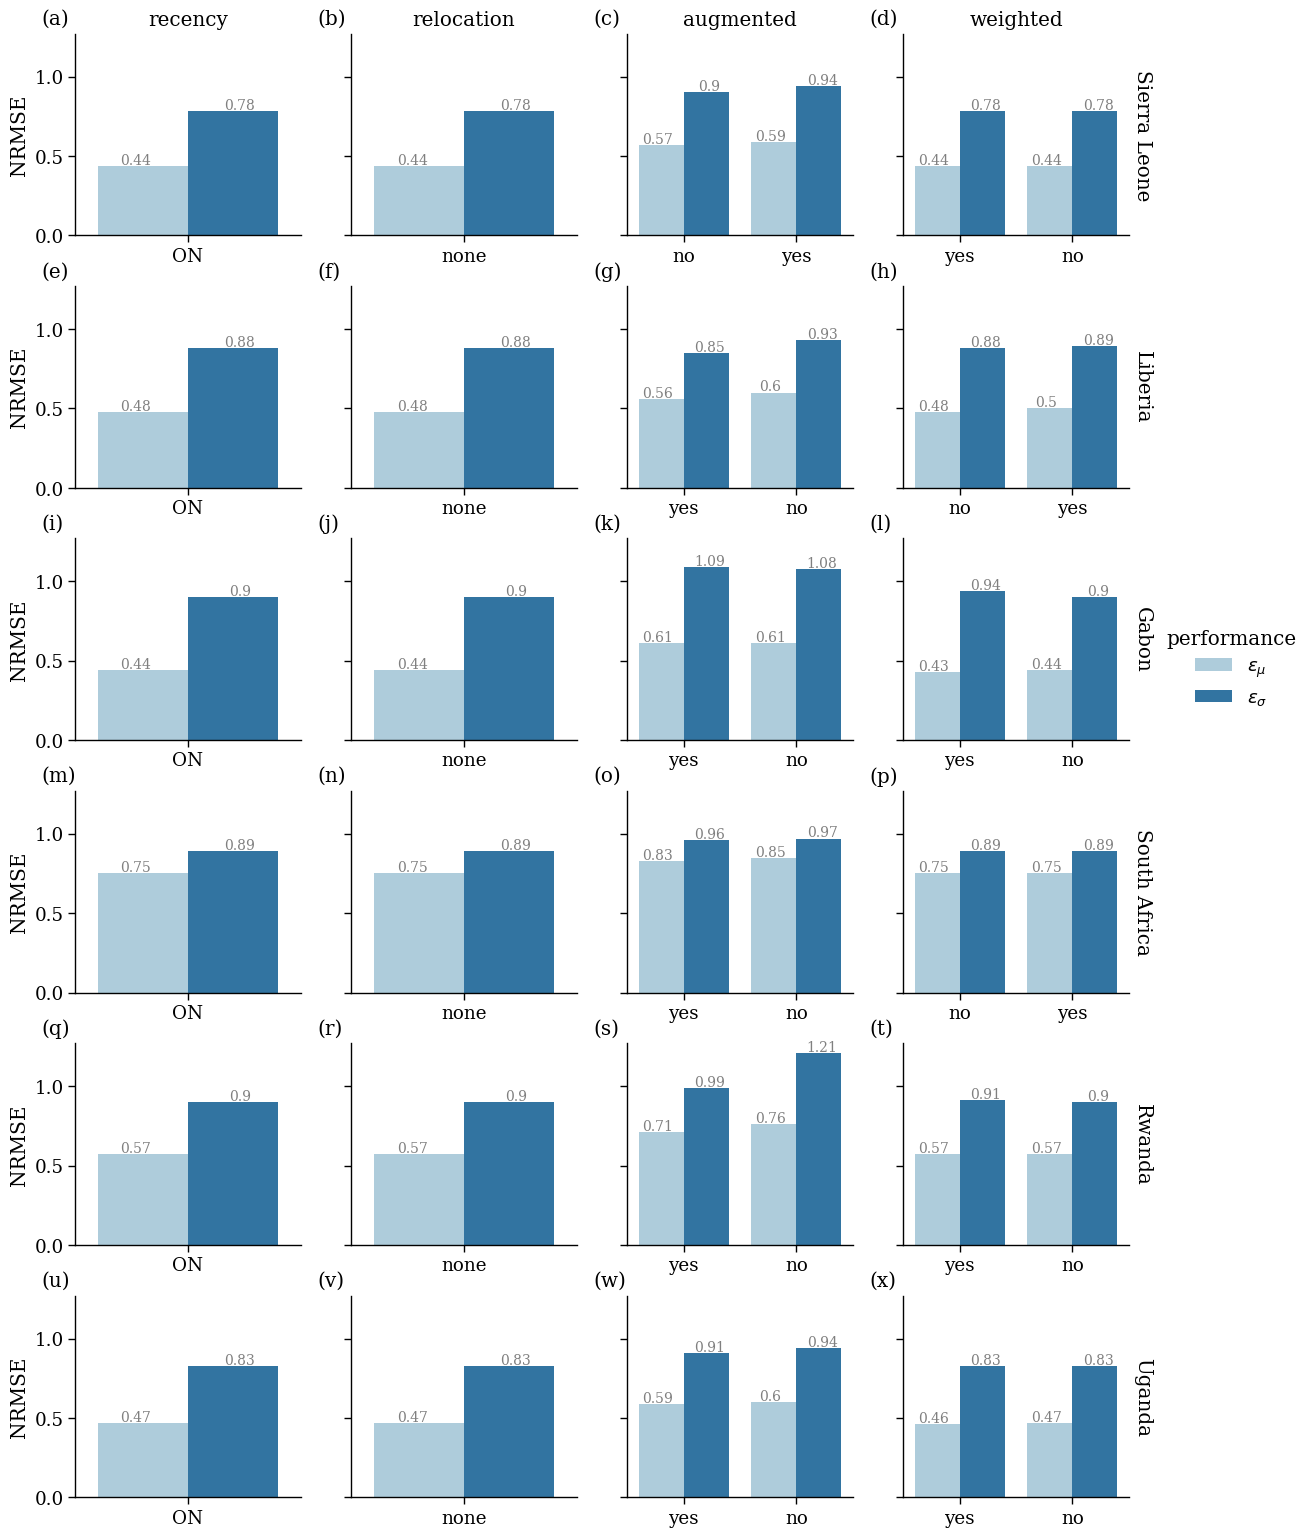

In [9]:
only_best = True
df_ba = main.get_summary_performance(df_dr, metric=METRIC, features_source=FSOURCE, only_best=only_best, output=RESULTS_FS)
main.plot_summary_performance(df_ba, metric=METRIC, countries_order=main.AFRICAN_COUNTRIES_ORDER, output=PLOTS_FS)

# Performance

## Models and data sources

In [10]:
main.tbl_performance_by_model_and_datasource(df_dr, metric=METRIC, features_source=FSOURCE, output=RESULTS_FS, overall=True)

valid_features:  ['OCI', 'FBP', 'NTLL', 'OSM']


,,,,,nrmse_GA,nrmse_mean_GA,nrmse_std_GA,nrmse_LB,nrmse_mean_LB,nrmse_std_LB,nrmse_RW,nrmse_mean_RW,nrmse_std_RW,nrmse_SL,nrmse_mean_SL,nrmse_std_SL,nrmse_ZA,nrmse_mean_ZA,nrmse_std_ZA,nrmse_UG,nrmse_mean_UG,nrmse_std_UG
model,Po,Nl,An,In,,,,,,,,,,,,,,,,,,
CB,y,y,y,y,0.669017,0.439141,0.898893,0.681336,0.480832,0.881840,0.736680,0.572178,0.901183,0.609424,0.437717,0.781130,0.820289,0.753697,0.886881,0.651308,0.472903,0.829713
CB$_w$,y,y,y,y,0.683267,0.427651,0.938883,0.691415,0.497519,0.885311,0.736947,0.566373,0.907521,0.610902,0.439022,0.782781,0.821361,0.753230,0.889492,0.644929,0.461099,0.828759
CNN,-,-,-,-,0.846927,0.608905,1.084949,0.766424,0.603935,0.928913,0.984677,0.757702,1.211652,0.735681,0.569621,0.901742,0.907646,0.848434,0.966857,0.767516,0.599464,0.935568
CNN$_a$,-,-,-,-,0.852077,0.613349,1.090804,0.705306,0.556004,0.854608,0.850944,0.714448,0.987440,0.764690,0.593339,0.936040,0.892881,0.830647,0.955116,0.754031,0.594764,0.913297
CNN$_a$+CB,y,y,y,y,0.648525,0.422895,0.874155,0.676882,0.484739,0.869025,0.760278,0.596122,0.924434,0.624493,0.461679,0.787307,0.791055,0.707439,0.874672,0.662340,0.470350,0.854330
CNN$_a$+CB$_w$,y,y,y,y,0.683367,0.435255,0.931479,0.673284,0.482790,0.863777,0.737704,0.573380,0.902028,0.628616,0.466610,0.790622,0.801442,0.717385,0.885498,0.660065,0.472314,0.847815
CNN+CB,y,y,y,y,0.729221,0.470786,0.987656,0.713280,0.543130,0.883430,0.755414,0.588644,0.922184,0.626989,0.451578,0.802399,0.828912,0.763282,0.894542,0.698016,0.520527,0.875504
CNN+CB$_w$,y,y,y,y,0.765963,0.480672,1.051254,0.726845,0.552186,0.901504,0.753237,0.589361,0.917113,0.634273,0.451028,0.817518,0.822196,0.763159,0.881232,0.699709,0.519134,0.880284
CB,y,-,-,-,0.711828,0.465969,0.957686,0.700975,0.528888,0.873061,0.781967,0.660082,0.903852,0.630545,0.459069,0.802021,0.895268,0.875081,0.915456,0.753379,0.606645,0.900114


## Best model

In [11]:
metric_best = 'rmse'
best_models = main.select_best_model(df_dr, features_source=FSOURCE, metric=metric_best, countries_order=main.AFRICAN_COUNTRIES_ORDER)
best_models.round(4)

,weighted,augmented,model,features,features_source,nrmse,nrmse_mean_wi,nrmse_std_wi,rmse,rmse_mean_wi,rmse_std_wi,mse,mse_mean_wi,mse_std_wi,r2,r2_mean_wi,r2_std_wi
country,,,,,,,,,,,,,,,,,
Sierra Leone,no,no,CB,metadata,OCI_FBP_NTLL_OSM,0.6094,0.4377,0.7811,4.8177,6.9188,2.7165,27.6702,47.9465,7.3940,0.5962,0.8070,0.3854
Liberia,no,no,CB,metadata,OCI_FBP_NTLL_OSM,0.6813,0.4808,0.8818,5.0367,6.7861,3.2873,28.7684,46.6871,10.8497,0.4884,0.7634,0.2135
Gabon,no,yes,CNN$_a$+CB,images+metadata,OCI_FBP_NTLL_OSM,0.6485,0.4229,0.8742,5.5682,8.4599,2.6765,39.5253,71.7913,7.2592,0.5217,0.8186,0.2249
South Africa,no,yes,CNN$_a$+CB,images+metadata,OCI_FBP_NTLL_OSM,0.7911,0.7074,0.8747,8.6843,12.8326,4.5361,92.7567,164.9309,20.5825,0.3627,0.4954,0.2299
Rwanda,yes,no,CB$_w$,metadata,OCI_FBP_NTLL_OSM,0.7369,0.5664,0.9075,5.4141,7.8555,2.9728,35.3543,61.8607,8.8478,0.4206,0.6751,0.1661
Uganda,yes,no,CB$_w$,metadata,OCI_FBP_NTLL_OSM,0.6449,0.4611,0.8288,4.9947,7.1264,2.8631,29.6393,51.0692,8.2095,0.5474,0.7853,0.3094


In [12]:
metric_best = 'r2'
best_models_r2 = main.select_best_model(df_dr, features_source=FSOURCE, metric=metric_best, countries_order=main.AFRICAN_COUNTRIES_ORDER)
best_models_r2.round(4)

,weighted,augmented,model,features,features_source,nrmse,nrmse_mean_wi,nrmse_std_wi,rmse,rmse_mean_wi,rmse_std_wi,mse,mse_mean_wi,mse_std_wi,r2,r2_mean_wi,r2_std_wi
country,,,,,,,,,,,,,,,,,
Sierra Leone,no,no,CB,metadata,OCI_FBP_NTLL_OSM,0.6094,0.4377,0.7811,4.8177,6.9188,2.7165,27.6702,47.9465,7.3940,0.5962,0.8070,0.3854
Liberia,yes,yes,CNN$_a$+CB$_w$,images+metadata,OCI_FBP_NTLL_OSM,0.6733,0.4828,0.8638,5.0158,6.8110,3.2205,28.4686,46.4939,10.4433,0.5036,0.7640,0.2433
Gabon,no,yes,CNN$_a$+CB,images+metadata,OCI_FBP_NTLL_OSM,0.6485,0.4229,0.8742,5.5682,8.4599,2.6765,39.5253,71.7913,7.2592,0.5217,0.8186,0.2249
South Africa,no,yes,CNN$_a$+CB,images+metadata,OCI_FBP_NTLL_OSM,0.7911,0.7074,0.8747,8.6843,12.8326,4.5361,92.7567,164.9309,20.5825,0.3627,0.4954,0.2299
Rwanda,yes,no,CB$_w$,metadata,OCI_FBP_NTLL_OSM,0.7369,0.5664,0.9075,5.4141,7.8555,2.9728,35.3543,61.8607,8.8478,0.4206,0.6751,0.1661
Uganda,yes,no,CB$_w$,metadata,OCI_FBP_NTLL_OSM,0.6449,0.4611,0.8288,4.9947,7.1264,2.8631,29.6393,51.0692,8.2095,0.5474,0.7853,0.3094


## Intersectionality

In [13]:
var = 'mean'
n_classes = 5
class_type = 'quantiles'
evaluation = 'rmse' # this is not the same as metric
main.tbl_intersectionality(df_rs, df_gt, n_classes=n_classes, class_type=class_type, 
                           features=main.MAIN_FEATURES,
                           features_source=FSOURCE,
                           var=var, evaluation=evaluation, output=RESULTS_FS)

Q1_GA      Q2_GA      Q3_GA      Q4_GA  \
settlement model                                                        
rural      CB               9.190951  11.523460  15.296840  22.246953   
           CB$_w$           8.610508  10.381013  16.294755  22.380191   
           CNN             18.937045   8.698990   9.714884  12.021650   
           CNN$_a$         17.142172   8.580934  12.493989   9.165266   
           CNN+CB          12.393919  10.025817  11.937483  16.655555   
           CNN+CB$_w$      12.719098   9.942755  13.492759  14.134227   
           CNN$_a$+CB       9.505292  10.257116  14.924893  20.114980   
           CNN$_a$+CB$_w$   9.119042   9.864430  15.751620  21.521611   
urban      CB                      -   7.391880   6.646518   5.734143   
           CB$_w$                  -   6.928412   5.912098   6.659985   
           CNN                     -  10.837387   9.547897  10.021379   
           CNN$_a$                 -   6.506937  10.232238  11.663850   
           CNN+CB                  -   9.152860   6.570187   6.784084   
           CNN+CB$_w$              -   8.120633   6.473535   6.898269   
           CNN$_a$+CB              -   6.658315   5.927709   6.086762   
           CNN$_a$+CB$_w$          -   7.019570   6.772660   6.919265   

                               Q5_GA      Q1_LB     Q2_LB     Q3_LB  \
settlement model                                                      
rural      CB                      -   5.865939  3.574318  4.652161   
           CB$_w$                  -   6.692440  3.461210  4.611101   
           CNN                     -   9.335868  5.298540  4.943457   
           CNN$_a$                 -   8.038634  4.610371  4.457977   
           CNN+CB                  -   7.574765  3.208660  4.995432   
           CNN+CB$_w$              -   8.023719  3.714987  5.171806   
           CNN$_a$+CB              -   6.383828  3.185735  4.324158   
           CNN$_a$+CB$_w$          -   6.625991  2.965356  4.362450   
urban      CB               8.495144  13.694664  4.333725  6.236703   
           CB$_w$           8.564228  13.671322  2.224522  7.040457   
           CNN             10.241473  10.833792  0.165459  5.411823   
           CNN$_a$          12.00612  10.666988  0.795867  2.801491   
           CNN+CB           9.099567  12.419246  1.289483  6.517301   
           CNN+CB$_w$       9.616265  12.504508  1.104935  6.213921   
           CNN$_a$+CB       8.133187  11.432978  2.452509  4.664306   
           CNN$_a$+CB$_w$   8.578422  12.197892  2.515229  5.342115   

                               Q4_LB      Q5_LB  ...      Q1_ZA      Q2_ZA  \
settlement model                                 ...                         
rural      CB              12.161216  18.041365  ...  13.394082   6.337055   
           CB$_w$          12.279408  18.133468  ...  13.702373   6.880964   
           CNN             10.225658  19.258098  ...  20.357403   9.684691   
           CNN$_a$          9.210237  18.864351  ...  20.178775   9.465694   
           CNN+CB          12.406275  19.463098  ...  16.804939   7.080128   
           CNN+CB$_w$      11.892135  20.045524  ...  16.711751   7.234563   
           CNN$_a$+CB      10.871512  18.034914  ...  13.799111   6.067811   
           CNN$_a$+CB$_w$  11.111177  18.595922  ...  13.996166   6.080630   
urban      CB               6.095335   7.148971  ...  36.439253  14.670219   
           CB$_w$           5.978497   7.369442  ...  35.207855  14.743358   
           CNN             10.096947   9.694649  ...  33.798919  13.428269   
           CNN$_a$          9.522753   9.534974  ...  33.646255  13.053707   
           CNN+CB           9.160427   7.520557  ...  35.568310  16.460430   
           CNN+CB$_w$       9.324193   7.582125  ...  35.655179  15.995089   
           CNN$_a$+CB       7.561789   7.645187  ...  34.963301  15.726014   
           CNN$_a$+CB$_w$   7.572490   6.900526  ...  35.971510  15.679772   

                              Q3

### Per country

In [14]:
cname = 'Gabon'
main.tbl_intersectionality(df_rs, df_gt, 
                            country_name = cname,
                            features = main.MAIN_FEATURES,
                            features_source = [FSOURCE, main.FSOURCE_IMAGE],
                            n_classes=n_classes, class_type=class_type, var=var, evaluation=evaluation, output=RESULTS)

Q1_GA      Q2_GA      Q3_GA      Q4_GA  \
settlement model                                                        
rural      CB               9.190951  11.523460  15.296840  22.246953   
           CB$_w$           8.610508  10.381013  16.294755  22.380191   
           CNN             18.937045   8.698990   9.714884  12.021650   
           CNN$_a$         17.142172   8.580934  12.493989   9.165266   
           CNN+CB          12.393919  10.025817  11.937483  16.655555   
           CNN+CB$_w$      12.719098   9.942755  13.492759  14.134227   
           CNN$_a$+CB       9.505292  10.257116  14.924893  20.114980   
           CNN$_a$+CB$_w$   9.119042   9.864430  15.751620  21.521611   
urban      CB                      -   7.391880   6.646518   5.734143   
           CB$_w$                  -   6.928412   5.912098   6.659985   
           CNN                     -  10.837387   9.547897  10.021379   
           CNN$_a$                 -   6.506937  10.232238  11.663850   
           CNN+CB                  -   9.152860   6.570187   6.784084   
           CNN+CB$_w$              -   8.120633   6.473535   6.898269   
           CNN$_a$+CB              -   6.658315   5.927709   6.086762   
           CNN$_a$+CB$_w$          -   7.019570   6.772660   6.919265   

                               Q5_GA  
settlement model                      
rural      CB                      -  
           CB$_w$                  -  
           CNN                     -  
           CNN$_a$                 -  
           CNN+CB                  -  
           CNN+CB$_w$              -  
           CNN$_a$+CB              -  
           CNN$_a$+CB$_w$          -  
urban      CB               8.495144  
           CB$_w$           8.564228  
           CNN             10.241473  
           CNN$_a$          12.00612  
           CNN+CB           9.099567  
           CNN+CB$_w$       9.616265  
           CNN$_a$+CB       8.133187  
           CNN$_a$+CB$_w$   8.578422

In [15]:
cname = 'Liberia'
main.tbl_intersectionality(df_rs, df_gt, 
                            country_name = cname,
                            features = main.MAIN_FEATURES,
                            features_source = [FSOURCE, main.FSOURCE_IMAGE],
                            n_classes=n_classes, class_type=class_type, var=var, evaluation=evaluation, output=RESULTS)

Q1_LB     Q2_LB     Q3_LB      Q4_LB      Q5_LB
settlement model                                                              
rural      CB               5.865939  3.574318  4.652161  12.161216  18.041365
           CB$_w$           6.692440  3.461210  4.611101  12.279408  18.133468
           CNN              9.335868  5.298540  4.943457  10.225658  19.258098
           CNN$_a$          8.038634  4.610371  4.457977   9.210237  18.864351
           CNN+CB           7.574765  3.208660  4.995432  12.406275  19.463098
           CNN+CB$_w$       8.023719  3.714987  5.171806  11.892135  20.045524
           CNN$_a$+CB       6.383828  3.185735  4.324158  10.871512  18.034914
           CNN$_a$+CB$_w$   6.625991  2.965356  4.362450  11.111177  18.595922
urban      CB              13.694664  4.333725  6.236703   6.095335   7.148971
           CB$_w$          13.671322  2.224522  7.040457   5.978497   7.369442
           CNN             10.833792  0.165459  5.411823  10.096947   9.694649
           CNN$_a$         10.666988  0.795867  2.801491   9.522753   9.534974
           CNN+CB          12.419246  1.289483  6.517301   9.160427   7.520557
           CNN+CB$_w$      12.504508  1.104935  6.213921   9.324193   7.582125
           CNN$_a$+CB      11.432978  2.452509  4.664306   7.561789   7.645187
           CNN$_a$+CB$_w$  12.197892  2.515229  5.342115   7.572490   6.900526

In [16]:
cname = 'Sierra Leone'
main.tbl_intersectionality(df_rs, df_gt, 
                            country_name = cname,
                            features = main.MAIN_FEATURES,
                            features_source = [FSOURCE, main.FSOURCE_IMAGE],
                            n_classes=n_classes, class_type=class_type, var=var, evaluation=evaluation, output=RESULTS)

Q1_SL      Q2_SL      Q3_SL      Q4_SL  \
settlement model                                                       
rural      CB              5.508807   2.729397   5.613629  10.541685   
           CB$_w$          5.820834   3.345779   5.187444   9.669702   
           CNN             7.718435   4.481068   4.674896  10.586058   
           CNN$_a$         8.962358   5.067710   4.801022  10.296463   
           CNN+CB          6.233414   3.549940   4.730946  10.336553   
           CNN+CB$_w$      6.135156   3.800570   4.762612  10.185683   
           CNN$_a$+CB      6.504501   3.419739   5.005067  11.031528   
           CNN$_a$+CB$_w$  6.778767   4.052070   5.245458  10.627068   
urban      CB                     -  13.750221   9.586913   5.932143   
           CB$_w$                 -  14.576870  10.933777   6.541614   
           CNN                    -   4.537812   2.829877  11.026990   
           CNN$_a$                -   6.770683   2.213214  10.957215   
           CNN+CB                 -  11.739352   4.679099   6.988110   
           CNN+CB$_w$             -  10.897130   6.446914   6.975003   
           CNN$_a$+CB             -  15.260159   9.203739   6.093517   
           CNN$_a$+CB$_w$         -  15.315517   9.373817   6.402290   

                               Q5_SL  
settlement model                      
rural      CB              21.675589  
           CB$_w$          20.616581  
           CNN             22.555835  
           CNN$_a$         23.408833  
           CNN+CB          20.548073  
           CNN+CB$_w$      18.828003  
           CNN$_a$+CB      22.009316  
           CNN$_a$+CB$_w$  21.489128  
urban      CB               8.761889  
           CB$_w$           8.782447  
           CNN             12.843923  
           CNN$_a$         13.229325  
           CNN+CB           9.396584  
           CNN+CB$_w$       9.546309  
           CNN$_a$+CB       9.391360  
           CNN$_a$+CB$_w$   9.233186

In [17]:
cname = 'Rwanda'
main.tbl_intersectionality(df_rs, df_gt, 
                            country_name = cname,
                            features = main.MAIN_FEATURES,
                            features_source = [FSOURCE, main.FSOURCE_IMAGE],
                            n_classes=n_classes, class_type=class_type, var=var, evaluation=evaluation, output=RESULTS)

Q1_RW      Q2_RW      Q3_RW     Q4_RW  \
settlement model                                                       
rural      CB               7.645253   5.438184   4.711085  8.745707   
           CB$_w$           7.661232   5.098509   5.215387  8.422933   
           CNN             12.883832   8.800133   6.442662  7.460878   
           CNN$_a$         11.811752   7.260449   5.556983  7.457343   
           CNN+CB           8.362047   4.835323   4.864382  8.418548   
           CNN+CB$_w$       8.332283   5.363680   4.402583  8.644344   
           CNN$_a$+CB       8.121537   5.595314   4.891335  8.422358   
           CNN$_a$+CB$_w$   8.208878   4.503818   4.532315  8.210683   
urban      CB                      -  11.320859   7.023786  4.188090   
           CB$_w$                  -  13.886422  10.903875  3.862846   
           CNN                     -  10.609074   1.816200  6.426874   
           CNN$_a$                 -   8.046860   0.650178  5.530361   
           CNN+CB                  -  11.259515   5.707391  4.891361   
           CNN+CB$_w$              -  10.845852   4.910210  3.654175   
           CNN$_a$+CB              -  11.272848   7.335153  4.259367   
           CNN$_a$+CB$_w$          -  13.461141   5.679382  3.442982   

                               Q5_RW  
settlement model                      
rural      CB              16.704203  
           CB$_w$          14.558897  
           CNN             16.036565  
           CNN$_a$         16.393131  
           CNN+CB          14.518224  
           CNN+CB$_w$      15.211325  
           CNN$_a$+CB      17.540065  
           CNN$_a$+CB$_w$  16.360353  
urban      CB               9.391306  
           CB$_w$           9.562103  
           CNN             13.353951  
           CNN$_a$         13.382775  
           CNN+CB          10.887648  
           CNN+CB$_w$      10.722971  
           CNN$_a$+CB      10.228170  
           CNN$_a$+CB$_w$   9.941740

In [18]:
cname = 'South Africa'
main.tbl_intersectionality(df_rs, df_gt, 
                            country_name = cname,
                            features = main.MAIN_FEATURES,
                            features_source = [FSOURCE, main.FSOURCE_IMAGE],
                            n_classes=n_classes, class_type=class_type, var=var, evaluation=evaluation, output=RESULTS)

Q1_ZA      Q2_ZA     Q3_ZA      Q4_ZA  \
settlement model                                                       
rural      CB              13.394082   6.337055  7.962317  24.198088   
           CB$_w$          13.702373   6.880964  8.388615  22.879403   
           CNN             20.357403   9.684691  8.606176  16.827992   
           CNN$_a$         20.178775   9.465694  9.770243  17.235900   
           CNN+CB          16.804939   7.080128  7.194847  20.391452   
           CNN+CB$_w$      16.711751   7.234563  7.568074  20.595324   
           CNN$_a$+CB      13.799111   6.067811  7.064664  21.887428   
           CNN$_a$+CB$_w$  13.996166   6.080630  7.999267  22.225433   
urban      CB              36.439253  14.670219  8.813492   7.588320   
           CB$_w$          35.207855  14.743358  9.191039   8.402095   
           CNN             33.798919  13.428269  9.199906  10.411235   
           CNN$_a$         33.646255  13.053707  8.509907  10.407519   
           CNN+CB          35.568310  16.460430  8.448359   7.757364   
           CNN+CB$_w$      35.655179  15.995089  8.520662   7.977622   
           CNN$_a$+CB      34.963301  15.726014  8.334510   6.920713   
           CNN$_a$+CB$_w$  35.971510  15.679772  8.725061   7.195395   

                               Q5_ZA  
settlement model                      
rural      CB                      -  
           CB$_w$                  -  
           CNN                     -  
           CNN$_a$                 -  
           CNN+CB                  -  
           CNN+CB$_w$              -  
           CNN$_a$+CB              -  
           CNN$_a$+CB$_w$          -  
urban      CB              14.966006  
           CB$_w$          14.809247  
           CNN             16.769713  
           CNN$_a$         15.651859  
           CNN+CB          13.626038  
           CNN+CB$_w$      13.469485  
           CNN$_a$+CB      12.385721  
           CNN$_a$+CB$_w$  11.927641

In [19]:
cname = 'Uganda'
main.tbl_intersectionality(df_rs, df_gt, 
                            country_name = cname,
                            features = main.MAIN_FEATURES,
                            features_source = [FSOURCE, main.FSOURCE_IMAGE],
                            n_classes=n_classes, class_type=class_type, var=var, evaluation=evaluation, output=RESULTS)

Q1_UG     Q2_UG      Q3_UG     Q4_UG      Q5_UG
settlement model                                                              
rural      CB               7.366724  3.557012   4.179880  7.601429  13.326089
           CB$_w$           7.004912  3.444719   3.672779  7.862220  13.338754
           CNN              9.835480  5.509773   4.868056  7.547941  16.467982
           CNN$_a$          9.656825  5.114393   4.606937  7.437432  16.720600
           CNN+CB           7.563644  4.643619   4.350448  7.835235  15.375683
           CNN+CB$_w$       7.487934  4.588012   4.616221  7.794337  15.019118
           CNN$_a$+CB       6.923835  3.432366   3.966985  7.947802  13.852446
           CNN$_a$+CB$_w$   7.013522  3.689738   3.961519  7.893097  13.901211
urban      CB               7.133152  8.121622   7.749547  6.719964   9.874337
           CB$_w$           6.110265  7.370084   9.243920  6.717849   9.382146
           CNN              9.769695  5.409654  11.947005  7.770634  13.375885
           CNN$_a$         10.114608  5.102072  13.944514  8.342513  13.184056
           CNN+CB           9.869952  6.372150   9.981416  7.667649  11.095564
           CNN+CB$_w$       8.898555  8.275951   9.556300  7.524686  11.134246
           CNN$_a$+CB       8.569914  6.790928   9.477720  6.399699   9.727708
           CNN$_a$+CB$_w$   8.506794  5.259028   8.618709  6.364634   9.884703

## Variability

In [20]:
df_rs.head(2)

,gt_config,relocation,recency,epoch,rural,year,rs,features,model,weighted,...,true_std,pred_std,residual_mean,residual_std,population_closest_tile,population_in_1mile,fn,country,country_code,features_source
0,DHS2019_MIS2016_all_none,none,ON,3,rural,2016,1924663743,images+metadata,CNN+CB$_w$,yes,...,11.016,8.303902,-1.862464,2.712098,15.566778,0.00000,DHS2019_MIS2016_all_none/epoch3-rs1924663743/n...,Sierra Leone,SL,OCI_FBP_NTLL_OSM
1,DHS2019_MIS2016_all_none,none,ON,3,rural,2016,1924663743,images+metadata,CNN+CB$_w$,yes,...,7.562,9.435736,-4.480389,-1.873736,9.129755,456.48775,DHS2019_MIS2016_all_none/epoch3-rs1924663743/n...,Sierra Leone,SL,OCI_FBP_NTLL_OSM


['Sierra Leone', 'Uganda', 'Rwanda', 'Liberia', 'Gabon', 'South Africa']
Categories (6, object): ['Gabon' < 'Liberia' < 'Rwanda' < 'Sierra Leone' < 'South Africa' < 'Uganda']
Sierra Leone
[INFO] Sierra Leone Q-0: 4.24
[INFO] Sierra Leone Q-1: 13.15
[INFO] Sierra Leone Q-2: 17.31
[INFO] Sierra Leone Q-3: 25.01
[INFO] Sierra Leone Q-4: 39.76
[INFO] Sierra Leone Q-5: 72.67
Uganda
[INFO] Uganda Q-0: 2.01
[INFO] Uganda Q-1: 14.08
[INFO] Uganda Q-2: 17.91
[INFO] Uganda Q-3: 22.39
[INFO] Uganda Q-4: 34.17
[INFO] Uganda Q-5: 82.87
Rwanda
[INFO] Rwanda Q-0: 8.89
[INFO] Rwanda Q-1: 20.50
[INFO] Rwanda Q-2: 24.12
[INFO] Rwanda Q-3: 28.98
[INFO] Rwanda Q-4: 43.19
[INFO] Rwanda Q-5: 72.93
Liberia
[INFO] Liberia Q-0: 4.10
[INFO] Liberia Q-1: 12.97
[INFO] Liberia Q-2: 17.70
[INFO] Liberia Q-3: 23.62
[INFO] Liberia Q-4: 37.45
[INFO] Liberia Q-5: 67.60
Gabon
[INFO] Gabon Q-0: 2.02
[INFO] Gabon Q-1: 28.25
[INFO] Gabon Q-2: 49.94
[INFO] Gabon Q-3: 61.33
[INFO] Gabon Q-4: 69.37
[INFO] Gabon Q-5: 87.17
Sou

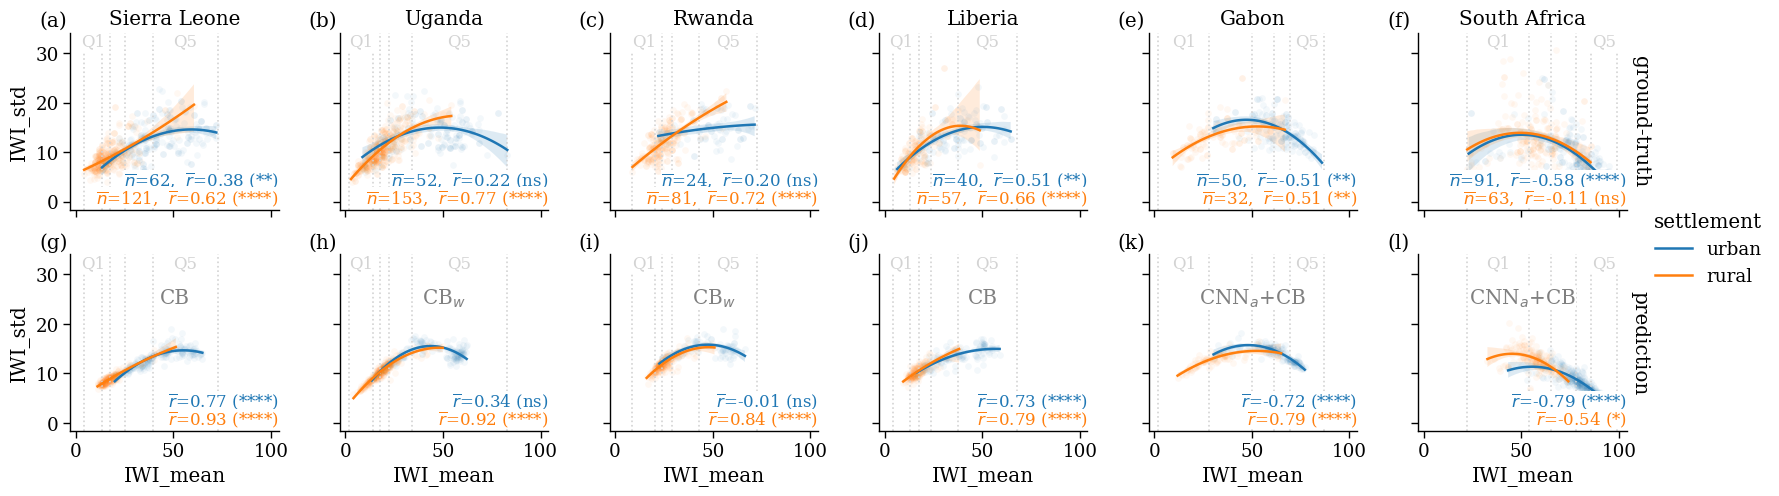

In [21]:
main.plot_variability(df_rs, df_gt, df_dr, metric=METRIC, features_source=FSOURCE,  countries_order=main.AFRICAN_COUNTRIES_ORDER, output=PLOTS_FS)

# High-resolution poverty maps

In [22]:
main.tbl_features_summary(root=ROOT, countries=COUNTRIES, years=YEARS, output=RESULTS)

country
Gabon           930.0
Liberia         930.0
Rwanda          930.0
Sierra Leone    957.0
South Africa    893.0
Uganda          957.0
dtype: float64


country,Gabon,Liberia,Rwanda,Sierra Leone,South Africa,Uganda
source,,,,,,
FBM,37.0,37.0,37.0,37.0,NaN,37.0
FBMV,NaN,NaN,NaN,27.0,NaN,27.0
GMSA,784.0,784.0,784.0,784.0,784.0,784.0
NTLL,36.0,36.0,36.0,36.0,36.0,36.0
OSM,54.0,54.0,54.0,54.0,54.0,54.0
cells,9.0,9.0,9.0,9.0,9.0,9.0
population,9.0,9.0,9.0,9.0,9.0,9.0
settlement,1.0,1.0,1.0,1.0,1.0,1.0


main-plots/OCI_FBP_NTLL_OSM/sm_hr_poverty_map_SL_CB_2016,2019_OCI_FBP_NTLL_OSM_mean.pdf saved!


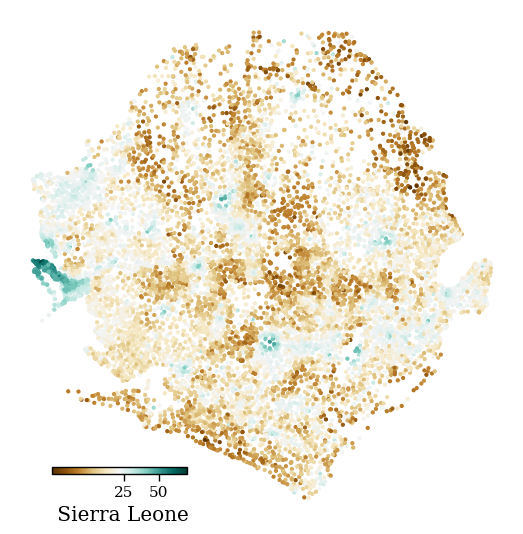

In [23]:
country = 'Sierra Leone'
main.plot_poverty_map(ccode=COUNTRIES_METADATA[country]['code'], years=COUNTRIES_METADATA[country]['years'], 
                      model=best_models.loc[country].model, features_source=FSOURCE, 
                      output=PLOTS_FS, ext='pdf', var='mean')

main-plots/OCI_FBP_NTLL_OSM/sm_hr_poverty_map_UG_CBw_2016,2018_OCI_FBP_NTLL_OSM_mean.pdf saved!


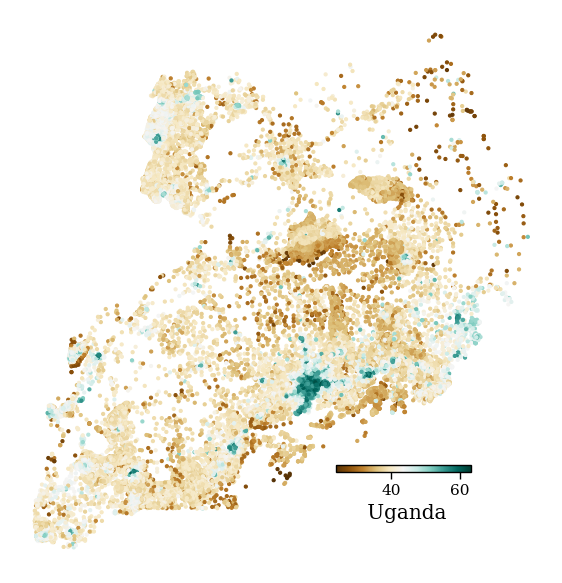

In [24]:
country = 'Uganda'
main.plot_poverty_map(ccode=COUNTRIES_METADATA[country]['code'], years=COUNTRIES_METADATA[country]['years'], 
                      model=best_models.loc[country].model, features_source=FSOURCE, 
                      output=PLOTS_FS, ext='pdf', var='mean')

main-plots/OCI_FBP_NTLL_OSM/sm_hr_poverty_map_LB_CB_2019,2022_OCI_FBP_NTLL_OSM_mean.pdf saved!


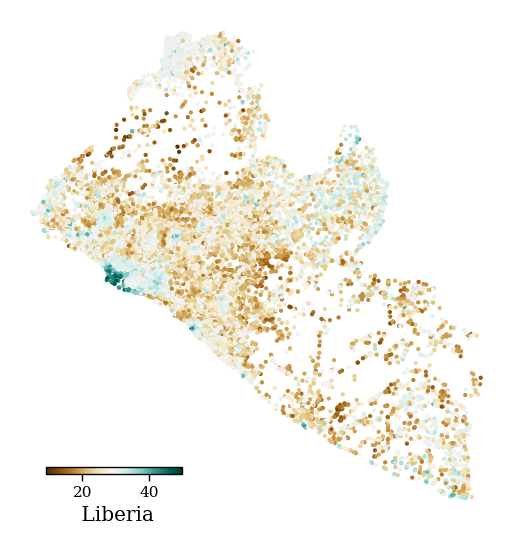

In [25]:
country = 'Liberia'
main.plot_poverty_map(ccode=COUNTRIES_METADATA[country]['code'], years=COUNTRIES_METADATA[country]['years'], 
                      model=best_models.loc[country].model, features_source=FSOURCE, 
                      output=PLOTS_FS, ext='pdf', var='mean')

main-plots/OCI_FBP_NTLL_OSM/sm_hr_poverty_map_RW_CBw_2019_OCI_FBP_NTLL_OSM_mean.pdf saved!


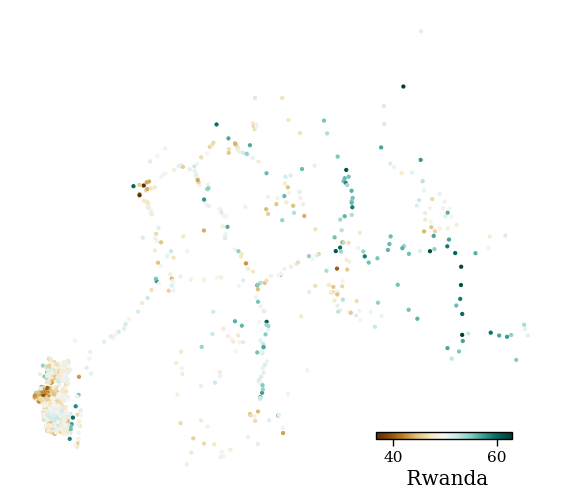

In [26]:
country = 'Rwanda'
main.plot_poverty_map(ccode=COUNTRIES_METADATA[country]['code'], years=COUNTRIES_METADATA[country]['years'], 
                      model=best_models.loc[country].model, features_source=FSOURCE, 
                      output=PLOTS_FS, ext='pdf', var='mean')

main-plots/OCI_FBP_NTLL_OSM/sm_hr_poverty_map_ZA_CNNa+CB_2017_OCI_FBP_NTLL_OSM_mean.pdf saved!


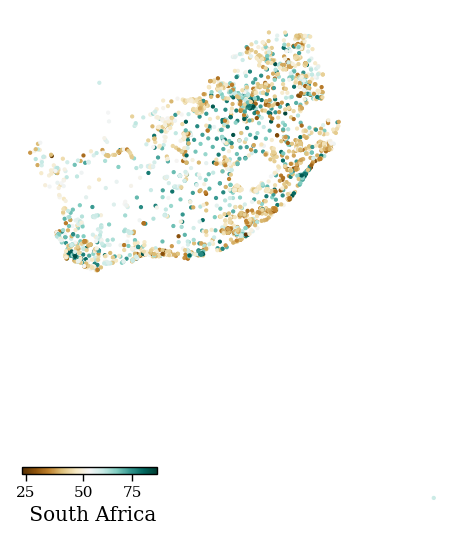

In [27]:
country = 'South Africa'
main.plot_poverty_map(ccode=COUNTRIES_METADATA[country]['code'], years=COUNTRIES_METADATA[country]['years'], 
                      model=best_models.loc[country].model, features_source=FSOURCE, 
                      output=PLOTS_FS, ext='pdf', var='mean')